In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xroms
%matplotlib notebook
# import mpld3
# mpld3.enable_notebook()

In [2]:
# Extract a subgrid for Skagerrak
A0 = xroms.roms_dataset('ocean_avg_0014.nc')
# A = xroms.subgrid(A0, subgrid=(115, 172, 30, 80))
A = xroms.subgrid(A0, subgrid_spec=(130, 170, 40, 75))


<IPython.core.display.Javascript object>


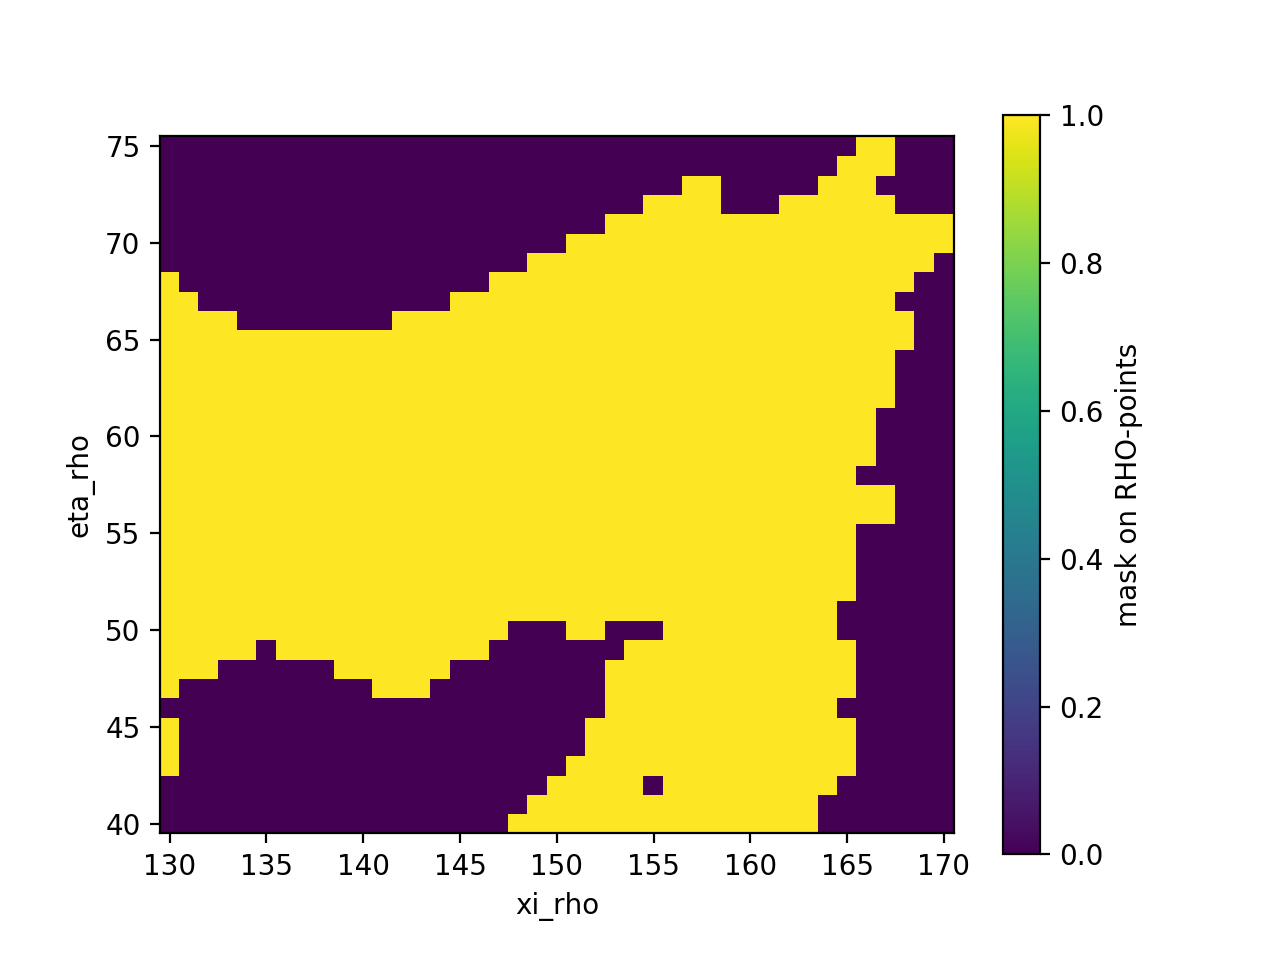

In [3]:
# Check the subgrid
plt.figure()
A.mask_rho.plot()
plt.axis('image');

In [4]:
# Salinity at 50 meter, timeframe=3
S = xroms.zslice(A.salt, z=50).isel(time=3)
print(S.min(), '\n', S.max())

<xarray.DataArray ()>
array(34.30762481689453, dtype=float32)
Coordinates:
    time     datetime64[ns] 1989-06-02T12:00:00
    z_rho    int64 -50 
 <xarray.DataArray ()>
array(35.175662994384766, dtype=float32)
Coordinates:
    time     datetime64[ns] 1989-06-02T12:00:00
    z_rho    int64 -50


<IPython.core.display.Javascript object>


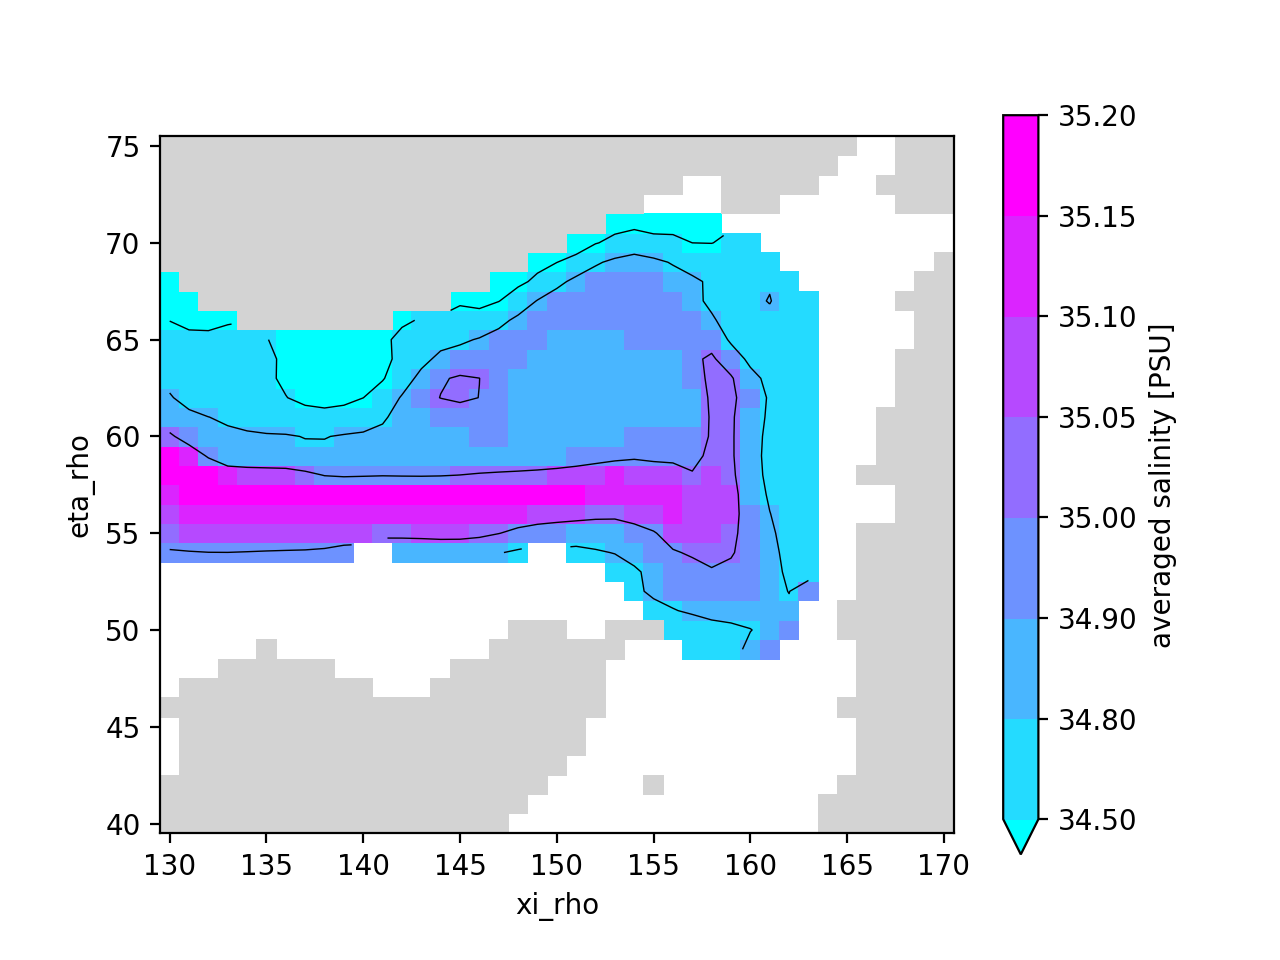

In [5]:
levels = [34.5, 34.8, 34.9, 35.0, 35.05, 35.1, 35.15, 35.2]
#S.plot.contourf(levels=levels, cmap='cool')
plt.figure()
S.plot(levels=levels, cmap='cool')
clevels = [34.5, 34.8, 35.0]
S.plot.contour(levels=clevels, colors='black', linewidths=0.5)
# Nice grey colour on land
A.mask_rho.plot(levels=[1], colors='LightGrey', add_colorbar=False)
plt.axis('image');

<IPython.core.display.Javascript object>


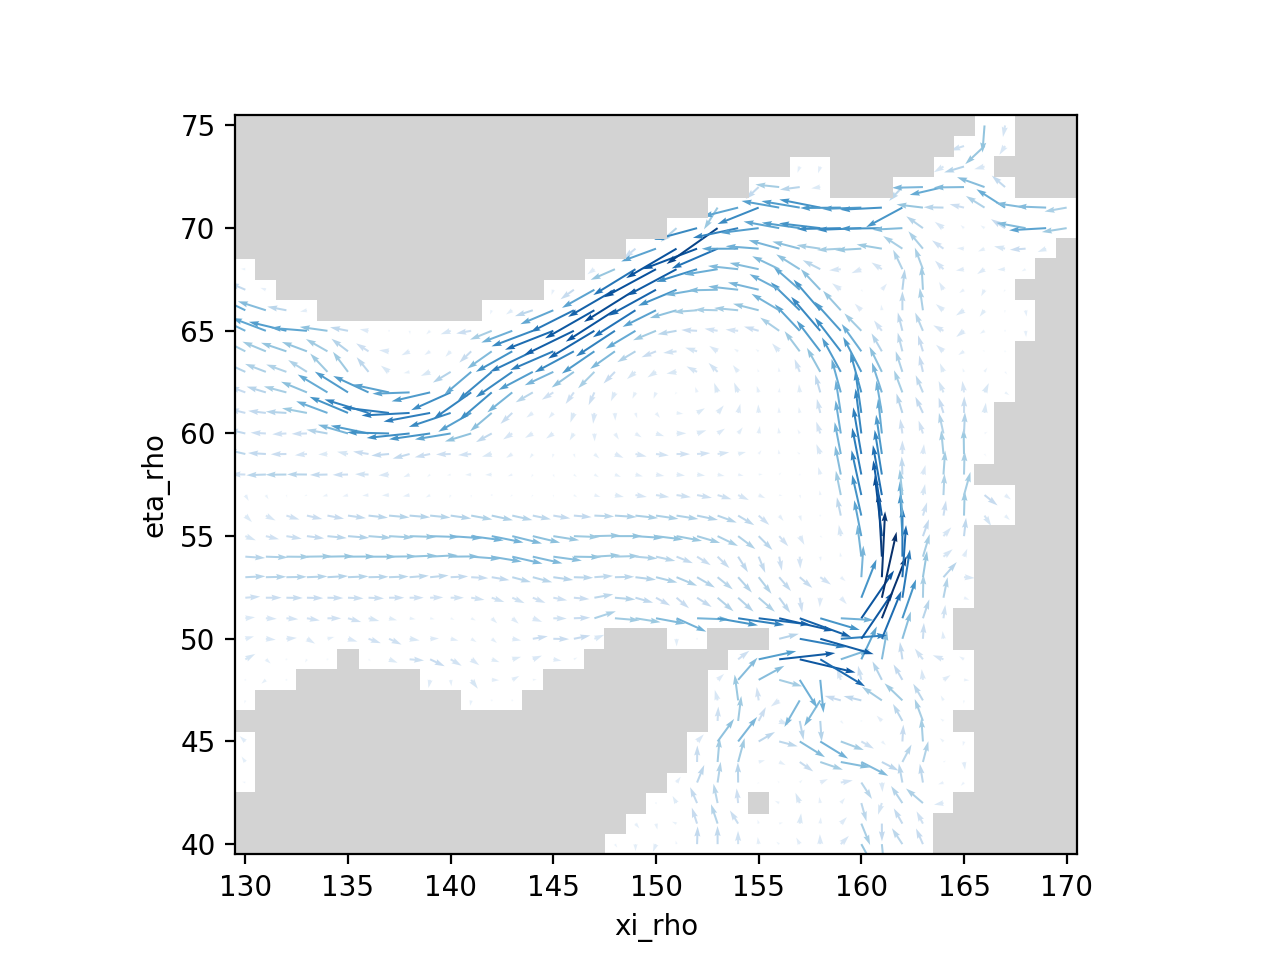

In [6]:
# Interpolate u and v to rho-points, along s-surfaces
A['u_rho'] = A.u.interp(coords={'xi_u': A.xi_rho, 'eta_u': A.eta_rho})
A['v_rho'] = A.v.interp(coords={'xi_v': A.xi_rho, 'eta_v': A.eta_rho})

# Slice to 50 meter at timeframe=3
U = xroms.zslice(A.u_rho, z=0).isel(time=3)
V = xroms.zslice(A.v_rho, z=0).isel(time=3)
speed = (U*U + V*V)**0.5


#speed.plot(alpha=0.8)
plt.figure()
plt.quiver(A.xi_rho, A.eta_rho, U, V, speed, cmap='Blues')

A.mask_rho.plot(levels=[1], colors='LightGrey', add_colorbar=False)
plt.axis('image')
plt.show()